# Testing Notebook

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import ds_functions as ds

import nbimporter
import DataProfiling as dp
import DataBalancing as db

data1 = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',', decimal='.')
data2 = pd.read_csv('qsar_oral_toxicity.csv', sep=';', decimal='.')

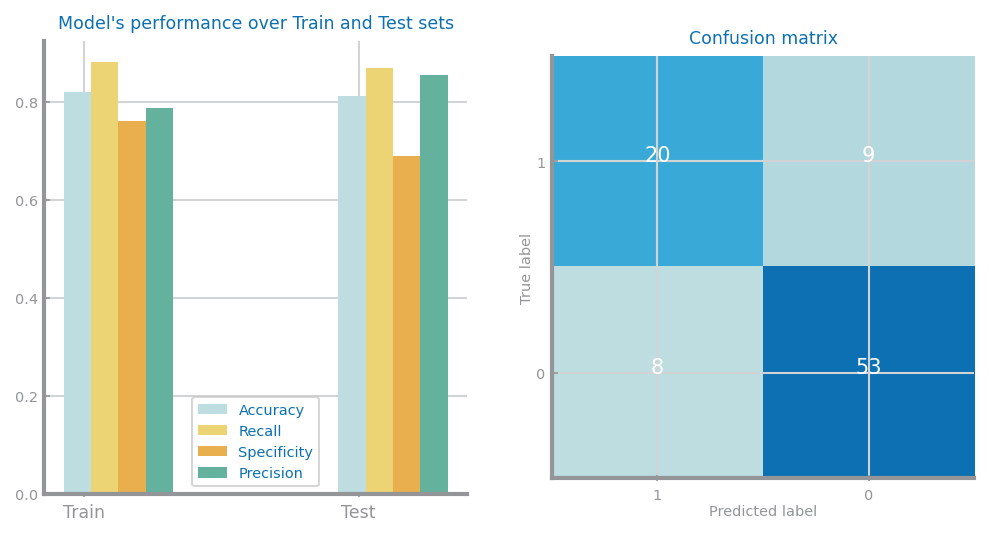

In [14]:
unbal = data1.copy()
y = unbal.pop('DEATH_EVENT').values
X = unbal.values

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

trnX, trnY = db.balance_SMOTE(trnX, trnY)

clf = GaussianNB()
clf.fit(trnX, trnY)
prd_trn = clf.predict(trnX)
prd_tst = clf.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)

In [15]:
data2 = dp.cast_object_to_categorical(data2)
data2.shape

(8991, 1025)